<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_07_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
"""
Generate a set of sample data
"""

def create_data():
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

In [3]:
'''
Print the data
'''

features, labels = create_data()
print('features: \n',features)
print('labels: \n',labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


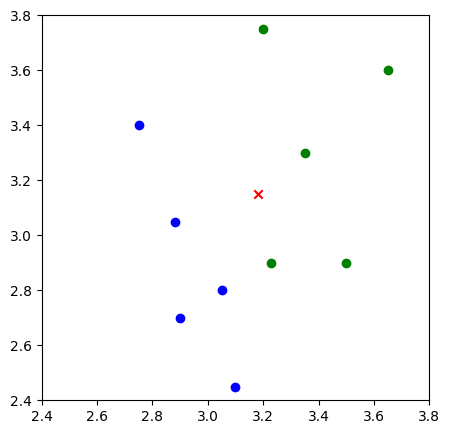

In [4]:
"""
Draw the sample data
"""

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature=list(map(lambda x:x[0],features)) # Return feature x of each data
y_feature=list(map(lambda y:y[1],features))
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g")
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]

In [5]:
"""
Manhattan Distance
"""

import numpy as np

def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

x = np.array([3.1, 3.2])
print("x:", x)
y = np.array([2.5, 2.8])
print("y:", y)
d_man = d_man(x, y)
print(d_man)

x: [3.1 3.2]
y: [2.5 2.8]
1.0000000000000004


In [6]:
"""
Euclidean distance
"""

import numpy as np

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

x = np.random.random(10)  # Randomly generate an array of 10 numbers as the value of x
print("x:", x)
y = np.random.random(10)
print("y:", y)
distance_euc = d_euc(x, y)
print(distance_euc)

x: [0.69365692 0.44993044 0.10419903 0.06879655 0.89087762 0.57778448
 0.54029922 0.96693234 0.8792323  0.4489572 ]
y: [0.01670049 0.31447343 0.17484324 0.51242453 0.92341768 0.76613628
 0.77177023 0.78576089 0.15690614 0.35370027]
1.1542015232823344


In [7]:
"""
Majority voting method
"""

import operator

def majority_voting(class_count):
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count

arr = {'A': 3, 'B': 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [8]:
"""
Complete realization of KNN
"""

def knn_classify(test_data, train_data, labels, k):
    distances = np.array([])  # Create an empty array to save the distance
    for each_data in train_data:  # Calculate data similarity using Euclidean distance
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)
    sorted_distance_index = distances.argsort()  # Get the indices sorted by distance
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k]+sorted_distance[k-1])/2  # Calculate the radius
    class_count = {}
    for i in range(k):  # Majority vote
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    final_label = majority_voting(class_count)
    return final_label, r

In [9]:
test_data=np.array([3.18,3.15])
final_label,r=knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

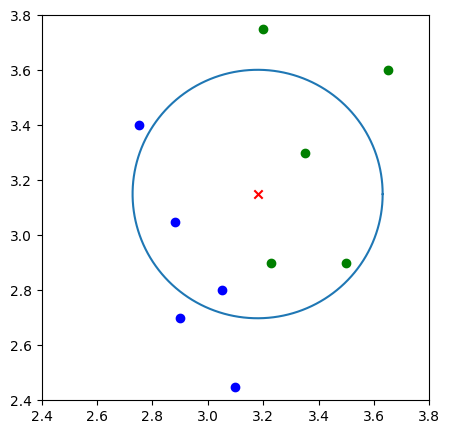

In [10]:
def circle(r, a, b):  # Polar coordinates ：x=r*cosθ，y=r*sinθ.
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
y_feature = list(map(lambda y: y[1], features))
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g")
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

interactive(children=(Dropdown(description='k', options=(3, 5, 7, 9), value=3), Output()), _dom_classes=('widg…

<function __main__.change_k(test_data, features, k)>

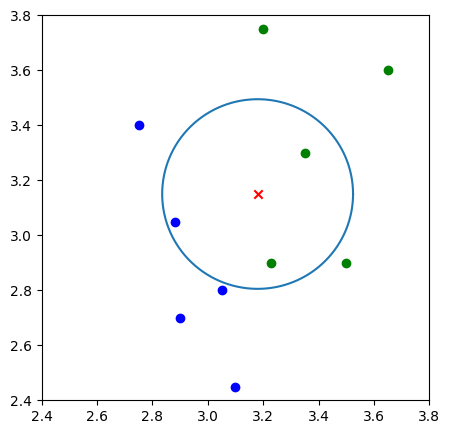

In [12]:
from ipywidgets import interact, fixed

def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)
    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))
    x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
    y_feature = list(map(lambda y: y[1], features))
    plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
    plt.scatter(x_feature[5:],y_feature[5:],c="g")
    plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

interact(change_k, test_data=fixed(test_data),
         features=fixed(features), k=[3, 5, 7, 9])